In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from pathlib import Path

data_path = Path('../../data_analysis_lect/datasets/medical_cost/medical_cost.csv')
df = pd.read_csv(data_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='region', ylabel='age_bin'>

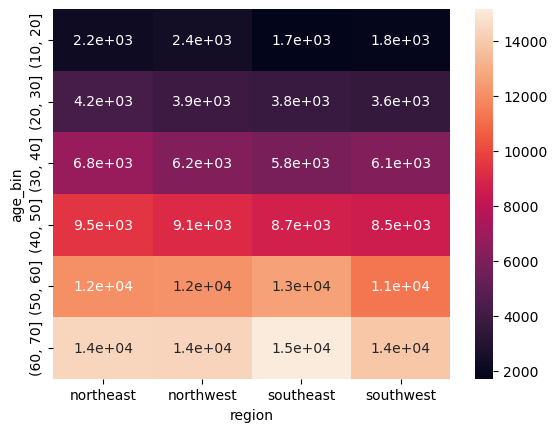

In [2]:

# age_bin 변수 그룹화 후 pivot table 생성 및 Seaborn heatmap 시각화
age_bin_list = np.arange(10, 80, 10)
df['age_bin'] = pd.cut(df['age'], bins=age_bin_list) #age 값을 bins를 기준으로 범주화 시킨다.

pivot_df = df.pivot_table(
    index='age_bin', columns='region', values='charges', aggfunc='median'
)

fig, ax = plt.subplots()
sns.heatmap(pivot_df, ax=ax, annot=True)

<Axes: xlabel='region', ylabel='age_bin'>

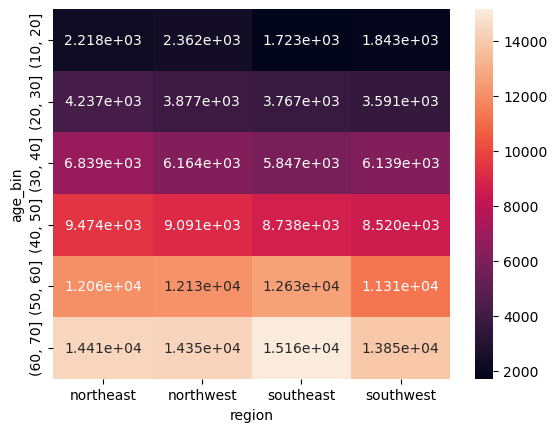

In [7]:

# Seaborn heatmap의 annotation 포멧 변경
fig, ax = plt.subplots()
sns.heatmap(pivot_df, ax=ax, annot=True, fmt='.3e')
# .3e : 소수점 아래 3자리까지 exponential로 표현
# .1f : 소수점 아래 1자리까지 실수값으로 표현

<Axes: xlabel='region', ylabel='age_bin'>

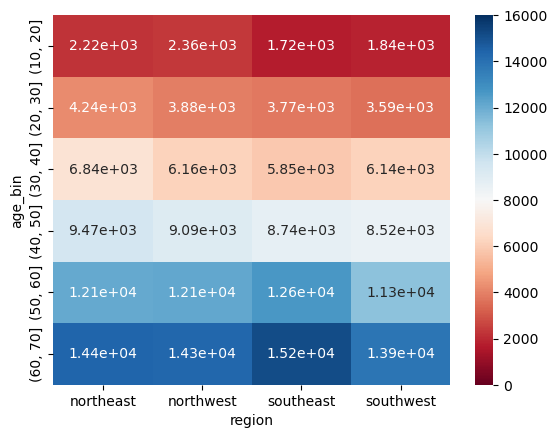

In [4]:
# Seaborn heatmap의 color map 활용
fig, ax = plt.subplots()
sns.heatmap(
    pivot_df, ax=ax, annot=True, fmt='.2e',
    vmax=16000, vmin=0, cmap='RdBu'
)
#vmax=16000, vmin=0 : 최대 최소값

<Axes: xlabel='region', ylabel='age_bin'>

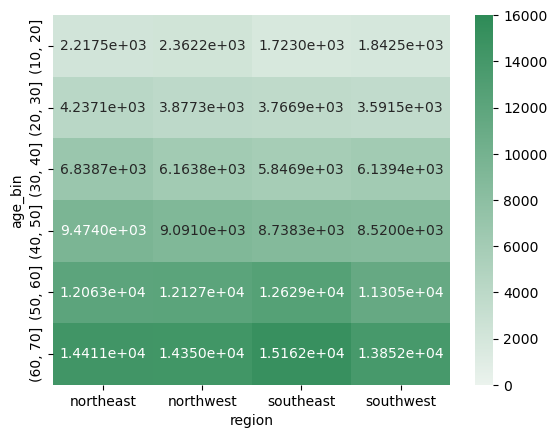

In [11]:
# Seaborn heatmap의 color map 활용
# light_palette https://seaborn.pydata.org/generated/seaborn.light_palette.html
color = sns.light_palette('seagreen', as_cmap=True)
fig, ax = plt.subplots()
sns.heatmap(
    pivot_df, ax=ax, annot=True, fmt='.4e',
    vmax=16000, vmin=0, cmap=color
)
#vmax=16000, vmin=0 : 최대 최소값

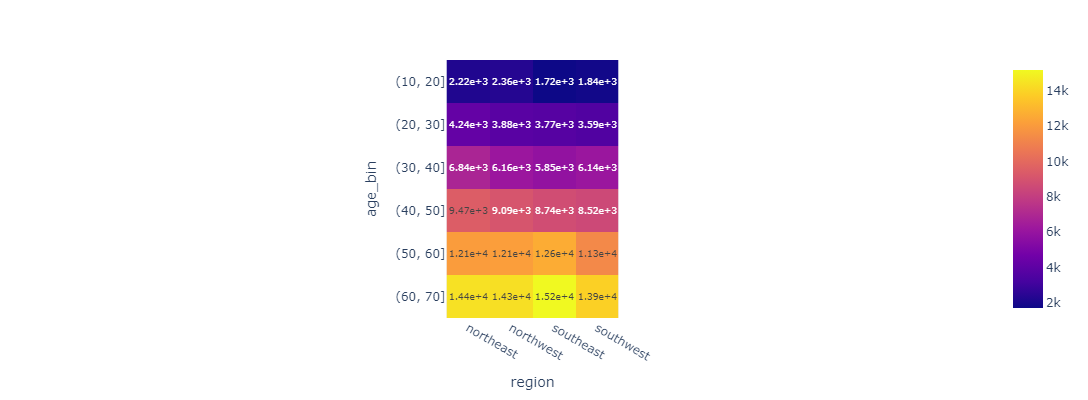

In [13]:
# Plotly heatmap
fig = px.imshow(
    pivot_df, x=pivot_df.columns, y=pivot_df.index.astype('str'), #pandas 버전에 따라 에러가 발생할 수 있어 string으로 변환
    text_auto='.2e', width=400, height=400
)
fig.show()

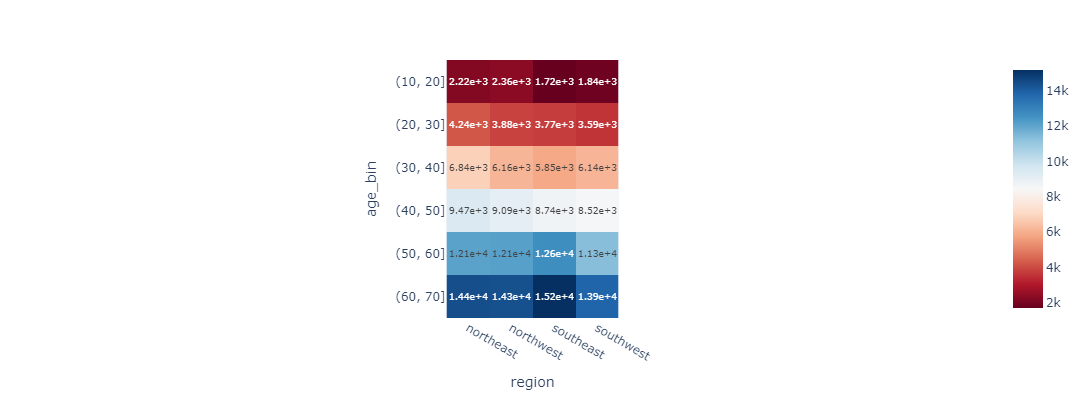

In [6]:
# Plotly heatmap의 color map 활용
fig = px.imshow(
    pivot_df, x=pivot_df.columns, y=pivot_df.index.astype('str'),  #pandas 버전에 따라 에러가 발생할 수 있어 string으로 변환
    text_auto='.2e',width=400, height=400,
    color_continuous_scale='RdBu'
)
fig.show()